# Candlestick Marubozu

https://www.investopedia.com/stock-analysis/cotd/pot20120801.aspx

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'BABA'
start = '2021-01-01'
end = '2021-10-22'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,226.500000,230.380005,225.039993,227.850006,227.850006,24897900
2021-01-05,229.050003,240.759995,228.119995,240.399994,240.399994,35823800
2021-01-06,234.949997,238.300003,225.860001,227.610001,227.610001,37146100
2021-01-07,229.309998,229.949997,220.089996,226.899994,226.899994,49361800
2021-01-08,227.880005,238.600006,226.682999,236.190002,236.190002,34884900


## Candlestick with Marubozu

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737794.0,226.500000,230.380005,225.039993,227.850006,227.850006,24897900,True
1,737795.0,229.050003,240.759995,228.119995,240.399994,240.399994,35823800,True
2,737796.0,234.949997,238.300003,225.860001,227.610001,227.610001,37146100,False
3,737797.0,229.309998,229.949997,220.089996,226.899994,226.899994,49361800,False
4,737798.0,227.880005,238.600006,226.682999,236.190002,236.190002,34884900,True


Text(0, 0.5, 'Price')

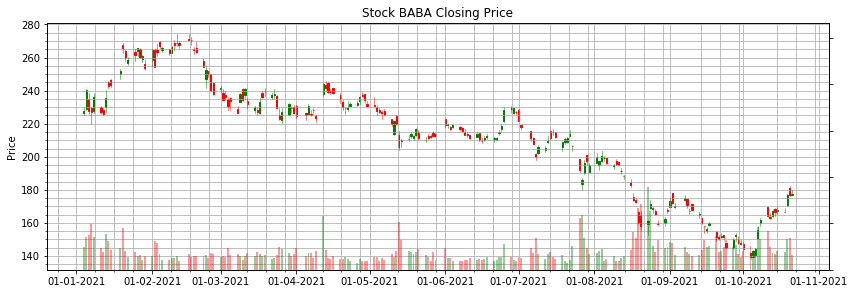

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
marubozu = talib.CDLMARUBOZU(df['Open'], df['High'], df['Low'], df['Close'])

marubozu = marubozu[marubozu != 0]

In [6]:
df['marubozu'] = talib.CDLMARUBOZU(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['marubozu'] !=0]

,Open,High,Low,Close,Adj Close,Volume,marubozu
Date,,,,,,,
2021-02-02,264.570007,265.000000,254.039993,254.500000,254.500000,30534300,-100
2021-02-25,250.000000,250.339996,240.070007,240.179993,240.179993,17967300,-100
2021-02-26,244.630005,244.899994,237.649994,237.759995,237.759995,17470700,-100
2021-03-09,233.380005,238.740005,233.074997,238.139999,238.139999,15291300,100
2021-03-24,236.830002,237.300003,229.240005,229.589996,229.589996,15949900,-100
2021-03-29,225.490005,232.380005,225.100006,231.860001,231.860001,18029100,100
2021-07-07,211.610001,212.050003,207.820007,208.000000,208.000000,18340400,-100
2021-09-02,178.009995,178.179993,171.669998,172.000000,172.000000,29302400,-100
2021-10-11,169.610001,169.800003,163.949997,163.949997,163.949997,42193600,-100


In [8]:
df['Adj Close'].loc[df['marubozu'] !=0]

Date
2021-02-02    254.500000
2021-02-25    240.179993
2021-02-26    237.759995
2021-03-09    238.139999
2021-03-24    229.589996
2021-03-29    231.860001
2021-07-07    208.000000
2021-09-02    172.000000
2021-10-11    163.949997
2021-10-19    177.000000
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['marubozu'] !=0].index

DatetimeIndex(['2021-02-02', '2021-02-25', '2021-02-26', '2021-03-09',
               '2021-03-24', '2021-03-29', '2021-07-07', '2021-09-02',
               '2021-10-11', '2021-10-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
marubozu

Date
2021-02-02   -100
2021-02-25   -100
2021-02-26   -100
2021-03-09    100
2021-03-24   -100
2021-03-29    100
2021-07-07   -100
2021-09-02   -100
2021-10-11   -100
2021-10-19    100
dtype: int32

In [11]:
marubozu.index

DatetimeIndex(['2021-02-02', '2021-02-25', '2021-02-26', '2021-03-09',
               '2021-03-24', '2021-03-29', '2021-07-07', '2021-09-02',
               '2021-10-11', '2021-10-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,marubozu
Date,,,,,,,
2021-01-04,226.500000,230.380005,225.039993,227.850006,227.850006,24897900,0
2021-01-05,229.050003,240.759995,228.119995,240.399994,240.399994,35823800,0
2021-01-06,234.949997,238.300003,225.860001,227.610001,227.610001,37146100,0
2021-01-07,229.309998,229.949997,220.089996,226.899994,226.899994,49361800,0
2021-01-08,227.880005,238.600006,226.682999,236.190002,236.190002,34884900,0
...,...,...,...,...,...,...,...
2021-10-15,166.990005,169.800003,165.434998,168.000000,168.000000,20747300,0
2021-10-18,166.580002,169.250000,166.580002,166.820007,166.820007,18945900,0
2021-10-19,170.600006,177.440002,170.449997,177.000000,177.000000,33538900,100


Text(0, 0.5, 'Price')

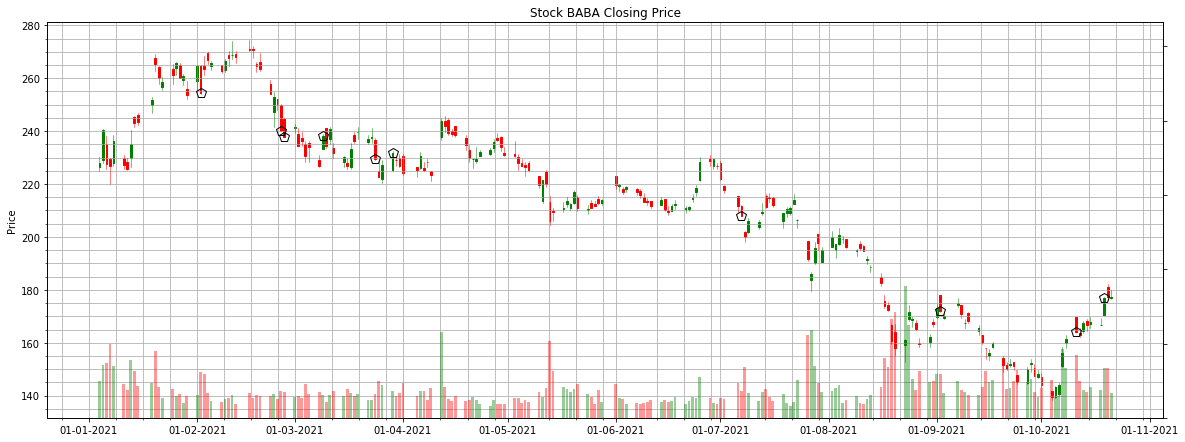

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['marubozu'] !=0].index, df['Adj Close'].loc[df['marubozu'] !=0],
                'pk', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-10-01':'2021-10-22']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,marubozu,VolumePositive
0,738064.0,147.089996,148.449997,143.339996,144.199997,144.199997,20211000,0,False
1,738067.0,141.699997,141.899994,138.429993,139.630005,139.630005,25218500,0,False
2,738068.0,139.380005,143.830002,139.190002,143.139999,143.139999,14032100,0,True
3,738069.0,140.559998,144.891998,139.960007,144.100006,144.100006,14875900,0,True
4,738070.0,151.050003,158.289993,150.750000,156.000000,156.000000,46035900,0,True


Text(0, 0.5, 'Price')

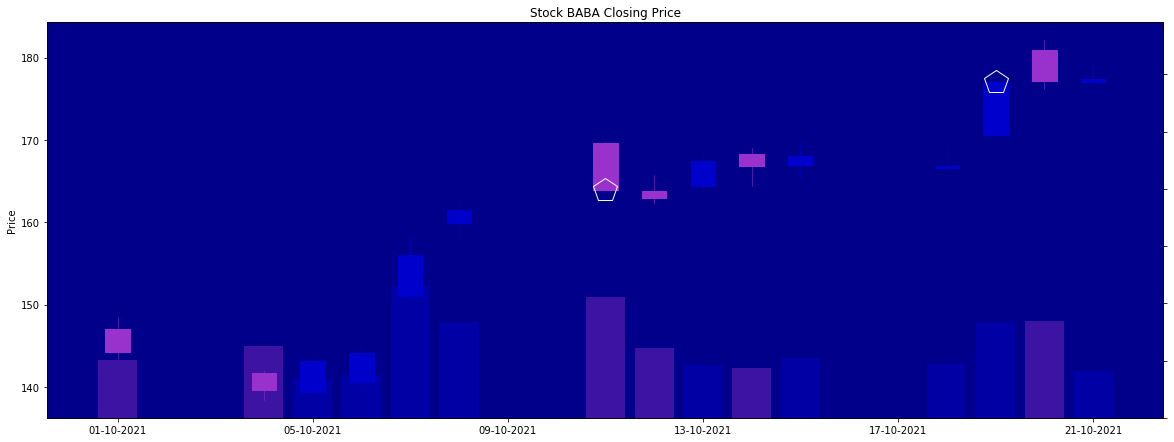

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('darkblue')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='mediumblue', colordown='darkorchid', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['marubozu'] !=0].index, df['Adj Close'].loc[df['marubozu'] !=0],
                'pw', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=25.0) 
colors = dfc.VolumePositive.map({True: 'mediumblue', False: 'darkorchid'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

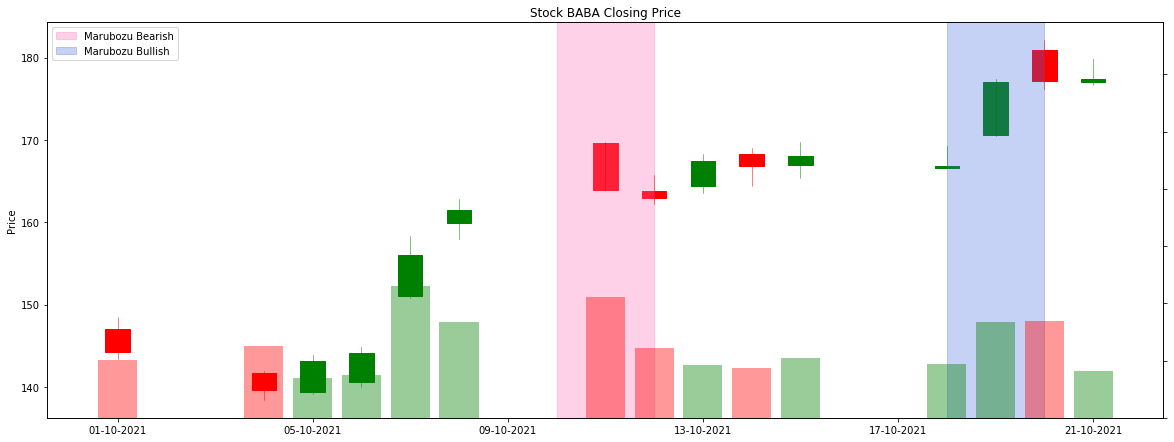

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,10,10)), date2num(datetime(2021,10,12)), 
           label="Marubozu Bearish",color="hotpink", alpha=0.3)
ax.axvspan(date2num(datetime(2021,10,18)), date2num(datetime(2021,10,20)), 
           label="Marubozu Bullish",color="royalblue", alpha=0.3)
ax.legend()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')